In [1]:
import  os
import pandas as pd

# Data Preparation 

In [13]:
file_name = []
for files in os.listdir(r"C:\Users\daiya\OneDrive\Desktop\Sale Analysis"):
    file_name.append(files)

In [14]:
file_name

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [15]:
sale_data = pd.DataFrame()

In [26]:
os.chdir(r'C:\Users\daiya\OneDrive\Desktop\Sale Analysis')

In [27]:
for i in file_name:
    dd=pd.read_csv(i,encoding='ISO-8859-1')
    sale_data = sale_data.append(dd)

In [30]:
sale_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,2004/7/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,2004/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,2004/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [31]:
sale_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [32]:
sale_data.shape

(186849, 6)

In [35]:
all_data = sale_data.copy()

In [39]:
# get all  rows with nan values
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
355,NaN,NaN,NaN,NaN,NaN,NaN
734,NaN,NaN,NaN,NaN,NaN,NaN
1432,NaN,NaN,NaN,NaN,NaN,NaN
1552,NaN,NaN,NaN,NaN,NaN,NaN
1570,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
10012,NaN,NaN,NaN,NaN,NaN,NaN
10274,NaN,NaN,NaN,NaN,NaN,NaN
10878,NaN,NaN,NaN,NaN,NaN,NaN
11384,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
all_data = all_data.dropna(how='all')  # drop nan, to drop rows with all nan values for all columsn
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,2004/7/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,2004/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,2004/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [50]:
# remove the useless rows of order date
all_data = all_data[all_data['Order Date'].str[0:2]!='Or']

In [51]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,2004/7/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,2004/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,2004/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [53]:
# change the data type for a certain column
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

D:\PathonSoftware\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\PathonSoftware\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [97]:
# add month column to the dataframe
def get_month(month):
    tmp =  month[0:2]
    if int(tmp) == 20:
         tmp = month.split('/')[1]
    return tmp
        
all_data['Month'] = all_data['Order Date'].apply(lambda x: f"{get_month(x)}")

all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

D:\PathonSoftware\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\PathonSoftware\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,State,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas,TX,23.90
1,176559,Bose SoundSport Headphones,1,99.99,2004/7/19 22:30,"682 Chestnut St, Boston, MA 02215",7,Boston,MA,99.99
2,176560,Google Phone,1,600.00,2004/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",12,Los Angeles,CA,600.00
3,176560,Wired Headphones,1,11.99,2004/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",12,Los Angeles,CA,11.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles,CA,11.99


In [98]:
a =list(all_data['Purchase Address'])[2]

In [99]:
# add city column

def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].strip(' ')[0:2]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)}")
all_data['State'] = all_data['Purchase Address'].apply(lambda x: f"{get_state(x)}")

D:\PathonSoftware\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
D:\PathonSoftware\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [100]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,State,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas,TX,23.90
1,176559,Bose SoundSport Headphones,1,99.99,2004/7/19 22:30,"682 Chestnut St, Boston, MA 02215",7,Boston,MA,99.99
2,176560,Google Phone,1,600.00,2004/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",12,Los Angeles,CA,600.00
3,176560,Wired Headphones,1,11.99,2004/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",12,Los Angeles,CA,11.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles,CA,11.99
...,...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,Los Angeles,CA,8.97
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,San Francisco,CA,700.00
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,San Francisco,CA,700.00
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,San Francisco,CA,379.99


# Data Exploration 

### Question 1: What was the best month for sales? How much earned for that month?

In [101]:
all_data['Sales']  = all_data['Quantity Ordered'] * all_data['Price Each']

D:\PathonSoftware\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [102]:
all_data.groupby(['Month']).sum()

,Quantity Ordered,Price Each,Sales
Month,,,
1,11605,1.929159e+06,1.940343e+06
2,14112,2.292466e+06,2.306519e+06
3,17690,2.903654e+06,2.920712e+06
4,13066,2.171888e+06,2.187293e+06
5,19313,3.238115e+06,3.256060e+06
6,15948,2.670649e+06,2.687731e+06
7,16713,2.735902e+06,2.751718e+06
8,14122,2.324565e+06,2.339354e+06
9,13798,2.196812e+06,2.209846e+06


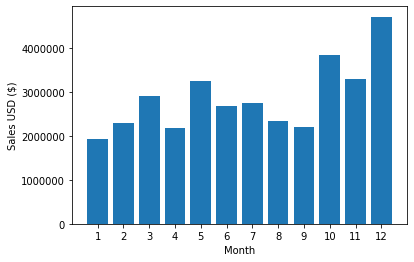

In [104]:
import matplotlib.pyplot as plt

months = range(1,13,1)
a
plt.bar(months,all_data.groupby(['Month']).sum()['Sales'])
plt.xticks(months)
plt.ylabel('Sales USD ($)')
plt.xlabel('Month')
plt.show()

# this plot shows month with the highest salary

### Question 2: What city sold the most product?

In [105]:
all_data.groupby(['City']).sum()

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta,16602,2.779908e+06,106293,2.795499e+06
Austin,11153,1.809874e+06,70833,1.819582e+06
Boston,22528,3.637410e+06,143041,3.661642e+06
Dallas,16730,2.752628e+06,105860,2.767975e+06
Los Angeles,33289,5.421435e+06,211243,5.452571e+06
New York City,27932,4.635371e+06,178236,4.664317e+06
Portland,14053,2.307747e+06,88964,2.320491e+06
San Francisco,50239,8.211462e+06,320243,8.262204e+06
Seattle,16553,2.733296e+06,106528,2.747755e+06


In [117]:
keys = [city for city,df in all_data.groupby(['City'])]

In [119]:
keys

['Atlanta',
 'Austin',
 'Boston',
 'Dallas',
 'Los Angeles',
 'New York City',
 'Portland',
 'San Francisco',
 'Seattle']

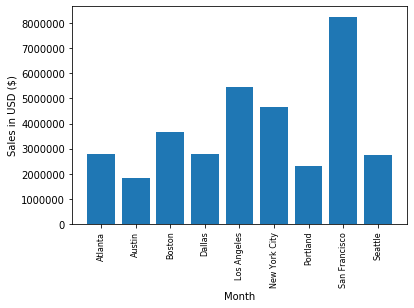

In [121]:
import matplotlib.pyplot as plt

keys = [city for city, df in all_data.groupby(['City'])]

plt.bar(keys,all_data.groupby(['City']).sum()['Sales'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

# Sna Francisco has the largest sales money

### Question 3:  What time should we display advertisements to maximize likelihood of customer's buying product?

In [122]:
# Add hour column
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute
all_data['Count'] = 1
all_data.head()

D:\PathonSoftware\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\PathonSoftware\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\PathonSoftware\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,State,Sales,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas,TX,23.90,8,46,1
1,176559,Bose SoundSport Headphones,1,99.99,2004/7/19 22:30,"682 Chestnut St, Boston, MA 02215",7,Boston,MA,99.99,22,30,1
2,176560,Google Phone,1,600.00,2004/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",12,Los Angeles,CA,600.00,14,38,1
3,176560,Wired Headphones,1,11.99,2004/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",12,Los Angeles,CA,11.99,14,38,1
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles,CA,11.99,9,27,1


In [125]:
keys = [pair for pair, df in all_data.groupby(['Hour'])]

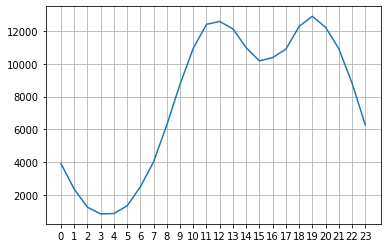

In [126]:
plt.plot(keys, all_data.groupby(['Hour']).count()['Count'])
plt.xticks(keys)
plt.grid()
plt.show()

# My recommendation is slightly before 11am or 7pm

### Question 4: What products are most often sold together?

In [131]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,State,Sales,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas,TX,23.90,8,46,1
1,176559,Bose SoundSport Headphones,1,99.99,2004/7/19 22:30,"682 Chestnut St, Boston, MA 02215",7,Boston,MA,99.99,22,30,1
2,176560,Google Phone,1,600.00,2004/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",12,Los Angeles,CA,600.00,14,38,1
3,176560,Wired Headphones,1,11.99,2004/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",12,Los Angeles,CA,11.99,14,38,1
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles,CA,11.99,9,27,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,Los Angeles,CA,8.97,20,56,1
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,San Francisco,CA,700.00,16,0,1
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,San Francisco,CA,700.00,7,39,1
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,San Francisco,CA,379.99,17,30,1


In [129]:
# we want to get the asscociated items sold 
df = all_data[all_data['Order ID'].duplicated(keep=False)]

In [130]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,State,Sales,Hour,Minute,Count
2,176560,Google Phone,1,600.00,2004/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",12,Los Angeles,CA,600.00,14,38,1
3,176560,Wired Headphones,1,11.99,2004/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",12,Los Angeles,CA,11.99,14,38,1
17,176574,Google Phone,1,600.00,2004/3/19 19:42,"20 Hill St, Los Angeles, CA 90001",3,Los Angeles,CA,600.00,19,42,1
18,176574,USB-C Charging Cable,1,11.95,2004/3/19 19:42,"20 Hill St, Los Angeles, CA 90001",3,Los Angeles,CA,11.95,19,42,1
29,176585,Bose SoundSport Headphones,1,99.99,2004/7/19 11:31,"823 Highland St, Boston, MA 02215",7,Boston,MA,99.99,11,31,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11628,259303,AA Batteries (4-pack),1,3.84,09/20/19 20:18,"106 7th St, Atlanta, GA 30301",9,Atlanta,GA,3.84,20,18,1
11639,259314,Wired Headphones,1,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,Atlanta,GA,11.99,0,25,1
11640,259314,AAA Batteries (4-pack),2,2.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,Atlanta,GA,5.98,0,25,1
11677,259350,Google Phone,1,600.00,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",9,San Francisco,CA,600.00,13,49,1


In [135]:
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

D:\PathonSoftware\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [137]:
# Drop the duplicates because we have duplicate items
df2 = df[['Order ID', 'Grouped']].drop_duplicates()

In [139]:
df2

,Order ID,Grouped
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586,"AAA Batteries (4-pack),Google Phone"
118,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
11617,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
11619,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
11627,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
11639,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [141]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)
    
# get the top 10 items sold together

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### Question 5: What product sold the most? Why do you think it sold the most?

In [155]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']
keys = [pair for pair, df in product_group]
amount  = list(quantity_ordered)
dic = {}
for i in range(0,len(keys)):
    dic[keys[i]] = amount[i]

In [158]:
dic = dict(sorted(dic.items(), key=lambda item: item[1]))

In [161]:
keys

dict_keys(['LG Dryer', 'LG Washing Machine', 'Vareebadd Phone', '20in Monitor', 'ThinkPad Laptop', 'Macbook Pro Laptop', 'Flatscreen TV', 'Google Phone', '34in Ultrawide Monitor', '27in 4K Gaming Monitor', 'iPhone', '27in FHD Monitor', 'Bose SoundSport Headphones', 'Apple Airpods Headphones', 'Wired Headphones', 'Lightning Charging Cable', 'USB-C Charging Cable', 'AA Batteries (4-pack)', 'AAA Batteries (4-pack)'])

In [163]:
values

dict_values([646, 666, 2068, 4129, 4130, 4728, 4819, 5532, 6199, 6244, 6849, 7550, 13457, 15661, 20557, 23217, 23975, 27635, 31017])

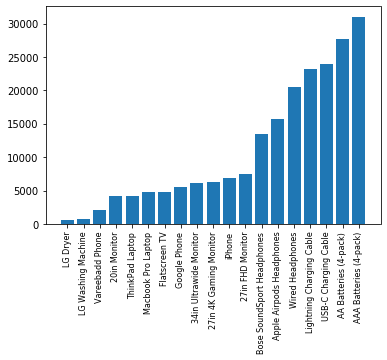

In [166]:
keys = dic.keys()
values = dic.values()

plt.bar(keys, values)

keys = list(keys)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

In [197]:
prices = all_data.groupby('Product').mean()['Price Each']
keys = [pair for pair, df in product_group]
dic2 = {}
for i in range(0,len(keys)):
    dic2[keys[i]] = prices[i]


In [199]:
keys = list(dic.keys())

prices = [dic2[keys[i]] for i in range(0, len(keys))]

D:\PathonSoftware\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


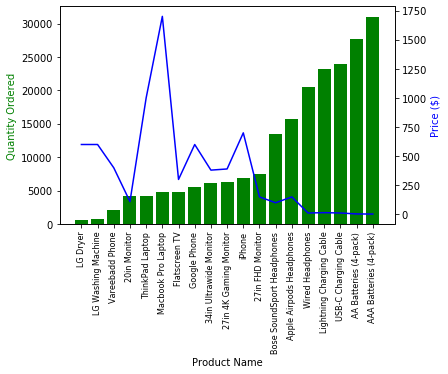

In [202]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, values,color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()

# from this plot, we can roughly see that the more price our product is, the fewer quantity for sell,
# of course there are some exceptions.